## Data Visualization

We will show the cooccurance data in a visualization using seaborn package

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set()

### Comorbidities

In [2]:
data_comorb = pd.read_csv("two_comorbidities.csv")

In [3]:
data_comorb.head(10)

,Unnamed: 0,Comorbidity 1:,Comorbidity 2:,Overlap
0,0,HIV,Acquired Immunodeficiency Syndrome,42
1,1,HIV,Neoplasms,57
2,2,HIV,Liver Diseases,28
3,3,HIV,Asthma,151
4,4,HIV,Lung Diseases,38
5,5,HIV,"Pulmonary Disease, Chronic Obstructive",79
6,6,HIV,Nervous System Diseases,4
7,7,HIV,Cerebrovascular Disorders,2
8,8,HIV,Kidney Diseases,9
9,9,HIV,Cardiomyopathies,8


In [4]:
C1 = data_comorb['Comorbidity 1:']
C2 = data_comorb['Comorbidity 2:']
V = data_comorb['Overlap']

In [5]:
U1 = []
for item in C1:
    if item not in U1:
        U1.append(item)

In [6]:
Data = []
for e1 in U1:
    data = {"name":e1}
    for ex,e2,v in zip(C1,C2,V):
        if ex==e1:
            data.update({e2:v})
    Data.append(data)

In [7]:
DF_comorb = pd.DataFrame(Data)

In [8]:
DF_comorb = DF_comorb.set_index("name")

In [9]:
DF_comorb = DF_comorb.fillna(0)

In [10]:
DF_comorb.shape

(26, 26)

In [1]:
plt.figure(figsize = [25,20])
sns.heatmap(DF_comorb, cmap="YlGnBu", annot = True, fmt='.0f',cbar=False)
plt.savefig("Comorb.pdf")

NameError: name 'plt' is not defined

In [12]:
DF_comorb.to_csv("comorb.csv")

#### Coocurance of Covid 19 and Heart Disease Mesh Terms

In [13]:
data_sign_cvd = pd.read_csv("signs_cvd.csv")

In [14]:
data_sign_cvd.head(10)

,Unnamed: 0,CVD:,Overlap,Signs:
0,0,Cardiovascular Diseases,6,Pharyngitis
1,1,Cardiovascular Infections,0,Pharyngitis
2,2,"Syphilis, Cardiovascular",0,Pharyngitis
3,3,"Tuberculosis, Cardiovascular",1,Pharyngitis
4,4,Heart Diseases,2,Pharyngitis
5,5,Carcinoid Heart Disease,0,Pharyngitis
6,6,Cardiac Conduction System Disease,0,Pharyngitis
7,7,Pre-Excitation Syndromes,0,Pharyngitis
8,8,Lown-Ganong-Levine Syndrome,0,Pharyngitis
9,9,"Pre-Excitation, Mahaim-Type",0,Pharyngitis


In [15]:
C1 = data_sign_cvd['Signs:']
C2 = data_sign_cvd['CVD:']
V = data_sign_cvd['Overlap']

In [16]:
U1 = []
for item in C1:
    if item not in U1:
        U1.append(item)

In [17]:
Data = []
for e1 in U1:
    data = {"name":e1}
    for ex,e2,v in zip(C1,C2,V):
        if ex==e1:
            data.update({e2:v})
    Data.append(data)

In [18]:
DF_sign_cvd = pd.DataFrame(Data)

In [19]:
DF_sign_cvd = DF_sign_cvd.set_index("name")

In [20]:
DF_sign_cvd = DF_sign_cvd.fillna(0)

In [21]:
DF_sign_cvd.shape

(30, 204)

In [22]:
#plt.figure(figsize = [60,12])
#sns.heatmap(DF_sign_cvd, cmap="YlGnBu", annot = True, fmt='.0f')

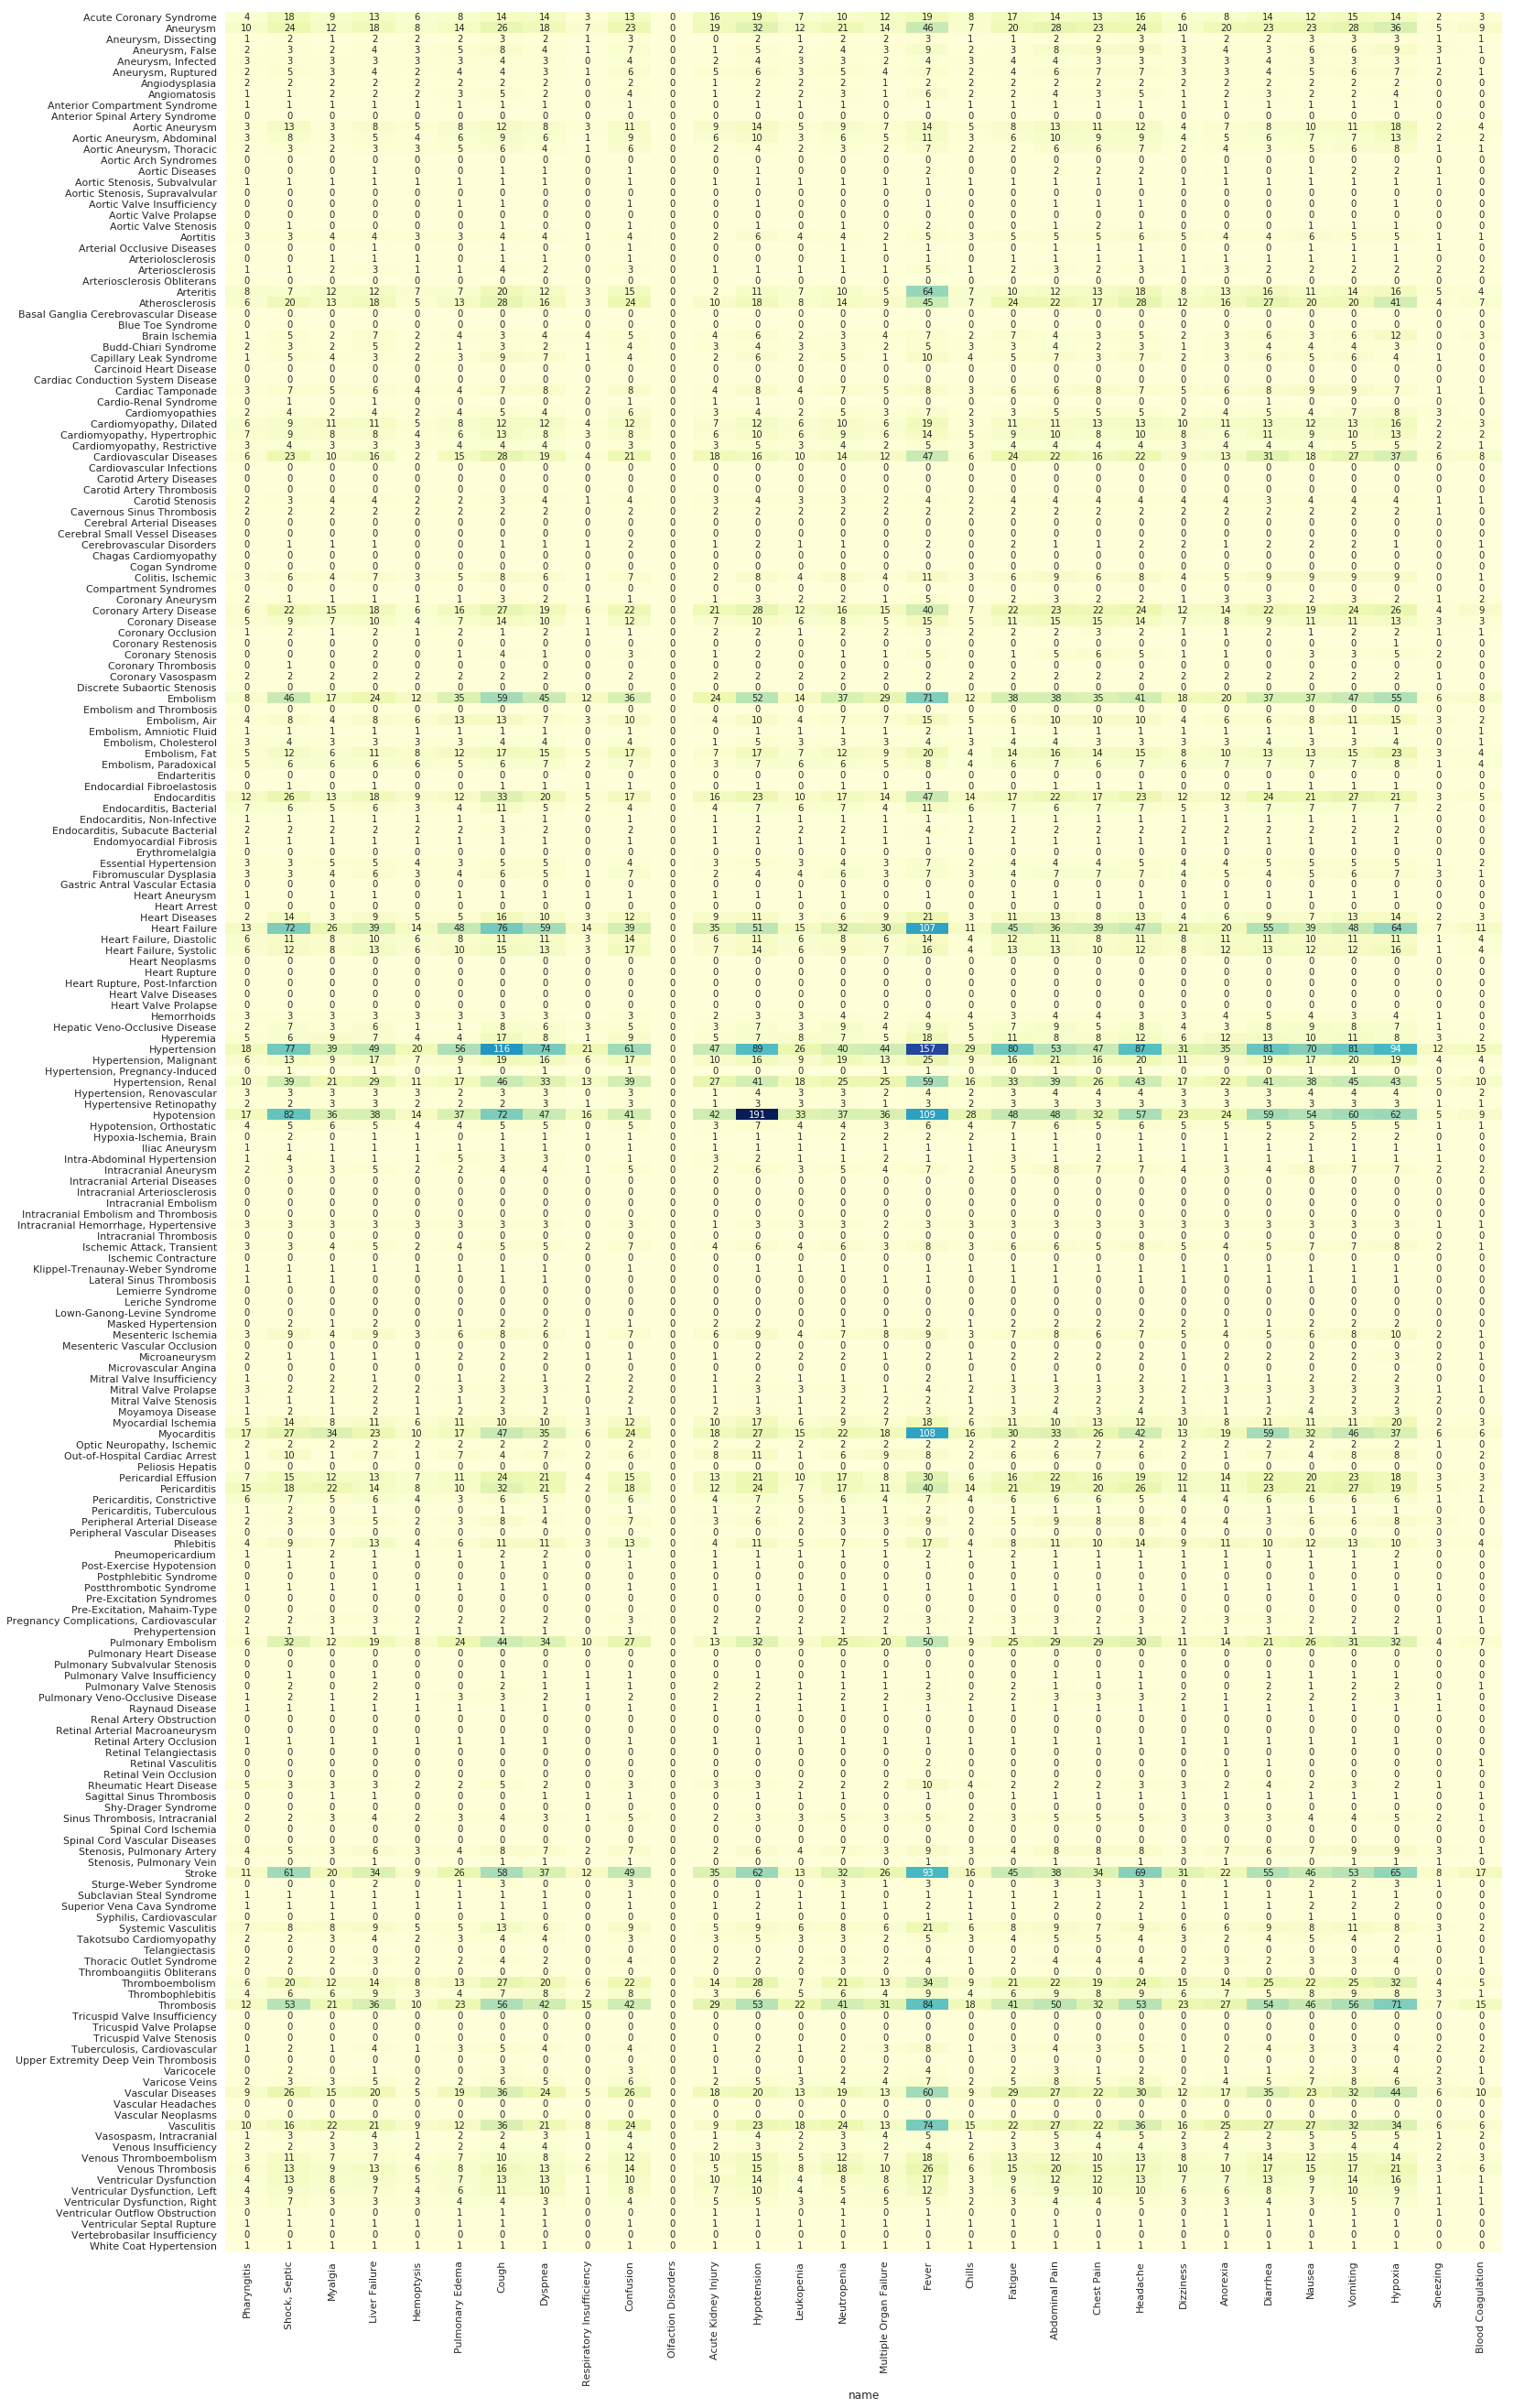

In [23]:
plt.figure(figsize = [25,45])
sns.heatmap(np.transpose(DF_sign_cvd), cmap="YlGnBu", annot = True, fmt='.0f',cbar=False)
plt.savefig("cvd-corona.pdf")

In [24]:
DF2 = np.transpose(DF_sign_cvd)

In [25]:
DF2.to_csv("cvd-corona.csv")